In [238]:
import platform
print(platform.platform())

Windows-10-10.0.26100-SP0


In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, TargetEncoder


# Randomforest
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# ANN training
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,LeakyReLU

from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsolutePercentageError

from keras.metrics import mean_absolute_percentage_error
from keras.metrics import RootMeanSquaredError
from keras.metrics import MeanAbsoluteError
from keras.optimizers import SGD, Adam
import keras_tuner as kt

import warnings
warnings.filterwarnings("ignore")

In [240]:
df = pd.read_csv("D:\SCALER\Business Case\Case Study-13(Neural Network)\portar_data.csv")
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,06-02-2015 22:24,06-02-2015 23:27,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,10-02-2015 21:49,10-02-2015 22:56,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,22-01-2015 20:39,22-01-2015 21:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,03-02-2015 21:21,03-02-2015 22:13,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,15-02-2015 02:40,15-02-2015 03:20,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [241]:
df.shape

(197428, 14)

In [242]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [244]:
correct_format = "%d-%m-%Y %H:%M"

df['created_at'] = pd.to_datetime(df['created_at'], format=correct_format, errors='coerce')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], format=correct_format, errors='coerce')

In [245]:
# Dependent variable

df['time_taken'] = df['actual_delivery_time'] - df['created_at']

In [246]:
df['time_taken_mins'] = pd.to_timedelta(df['time_taken'])/pd.Timedelta('60s')

In [247]:
# Extracting hour and day of week from the data

df['hour']=df['created_at'].dt.hour
df['day']=df['created_at'].dt.dayofweek

In [248]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken,time_taken_mins,hour,day
0,1.0,2015-02-06 22:24:00,2015-02-06 23:27:00,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,0 days 01:03:00,63.0,22,4
1,2.0,2015-02-10 21:49:00,2015-02-10 22:56:00,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,0 days 01:07:00,67.0,21,1
2,3.0,2015-01-22 20:39:00,2015-01-22 21:09:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,0 days 00:30:00,30.0,20,3
3,3.0,2015-02-03 21:21:00,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,0 days 00:52:00,52.0,21,1
4,3.0,2015-02-15 02:40:00,2015-02-15 03:20:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,0 days 00:40:00,40.0,2,6


In [249]:
(df.isnull().sum()/len(df))*100

market_id                   0.499929
created_at                  0.000000
actual_delivery_time        0.003546
store_id                    0.000000
store_primary_category      2.411006
order_protocol              0.503981
total_items                 0.000000
subtotal                    0.000000
num_distinct_items          0.000000
min_item_price              0.000000
max_item_price              0.000000
total_onshift_partners      8.236927
total_busy_partners         8.236927
total_outstanding_orders    8.236927
time_taken                  0.003546
time_taken_mins             0.003546
hour                        0.000000
day                         0.000000
dtype: float64

total number of obseration is: 197428


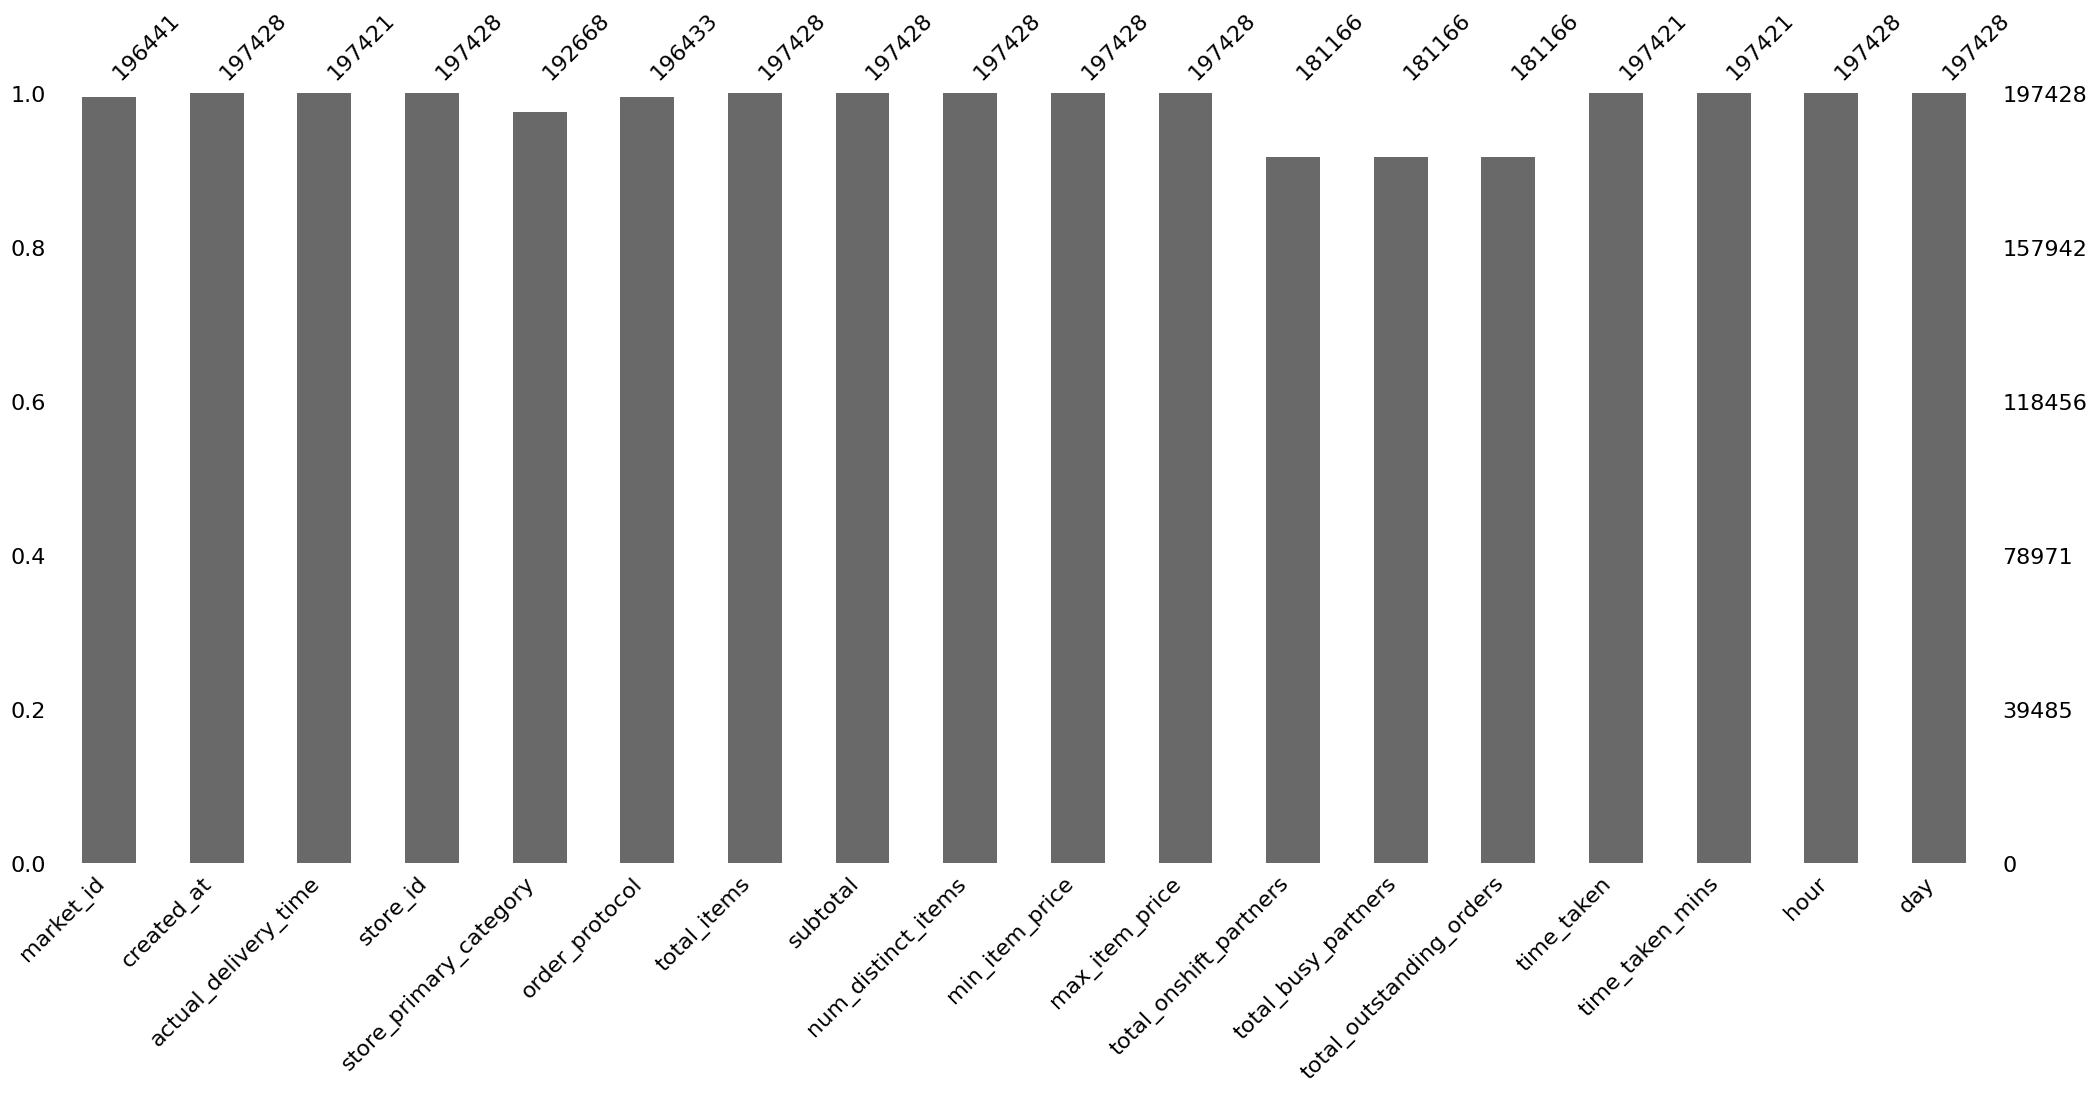

In [250]:
print ('total number of obseration is:',df.shape[0])

msno.bar(df)
plt.show()

In [251]:
df = df.dropna()

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176248 entries, 0 to 197427
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   market_id                 176248 non-null  float64        
 1   created_at                176248 non-null  datetime64[ns] 
 2   actual_delivery_time      176248 non-null  datetime64[ns] 
 3   store_id                  176248 non-null  object         
 4   store_primary_category    176248 non-null  object         
 5   order_protocol            176248 non-null  float64        
 6   total_items               176248 non-null  int64          
 7   subtotal                  176248 non-null  int64          
 8   num_distinct_items        176248 non-null  int64          
 9   min_item_price            176248 non-null  int64          
 10  max_item_price            176248 non-null  int64          
 11  total_onshift_partners    176248 non-null  float64       

In [253]:
num_cols = ['total_items' , 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price' , 'total_onshift_partners', 
            'total_busy_partners' , 'total_outstanding_orders']
cat_cols = ['market_id', 'store_id','order_protocol',  'store_primary_category', 'hour', 'day']
target = 'time_taken_mins'

In [254]:
for col in cat_cols:
    df['col'] = df[col].astype('str')

In [255]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
market_id,176248.0,2.743747,1.0,2.0,2.0,4.0,6.0,1.330911
created_at,176248,2015-02-04 19:35:13.744155904,2015-01-21 15:22:00,2015-01-29 01:36:45,2015-02-05 02:30:00,2015-02-12 00:52:15,2015-02-18 06:00:00,NaN
actual_delivery_time,176248,2015-02-04 20:22:59.741274112,2015-01-21 16:16:00,2015-01-29 02:24:00,2015-02-05 03:31:00,2015-02-12 01:35:00,2015-02-19 22:45:00,NaN
order_protocol,176248.0,2.911687,1.0,1.0,3.0,4.0,7.0,1.51292
total_items,176248.0,3.204592,1.0,2.0,3.0,4.0,411.0,2.673899
subtotal,176248.0,2696.498939,0.0,1408.0,2221.0,3407.0,26800.0,1828.922584
num_distinct_items,176248.0,2.674589,1.0,1.0,2.0,3.0,20.0,1.625558
min_item_price,176248.0,684.93773,-86.0,299.0,595.0,942.0,14700.0,519.911425
max_item_price,176248.0,1159.886994,0.0,799.0,1095.0,1395.0,14700.0,560.78451
total_onshift_partners,176248.0,44.905276,-4.0,17.0,37.0,65.0,171.0,34.529394


In [256]:
df = df.drop(['created_at', 'actual_delivery_time', 'time_taken'], axis=1)

In [257]:
df.head()

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken_mins,hour,day,col
0,1.0,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,63.0,22,4,4
1,2.0,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.0,21,1,1
8,2.0,f0ade77b43923b38237db569b016ba25,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,27.0,0,0,0
14,1.0,ef1e491a766ce3127556063d49bc2f98,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,38.0,3,3,3
15,1.0,ef1e491a766ce3127556063d49bc2f98,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,50.0,2,1,1


# Univariate analysis

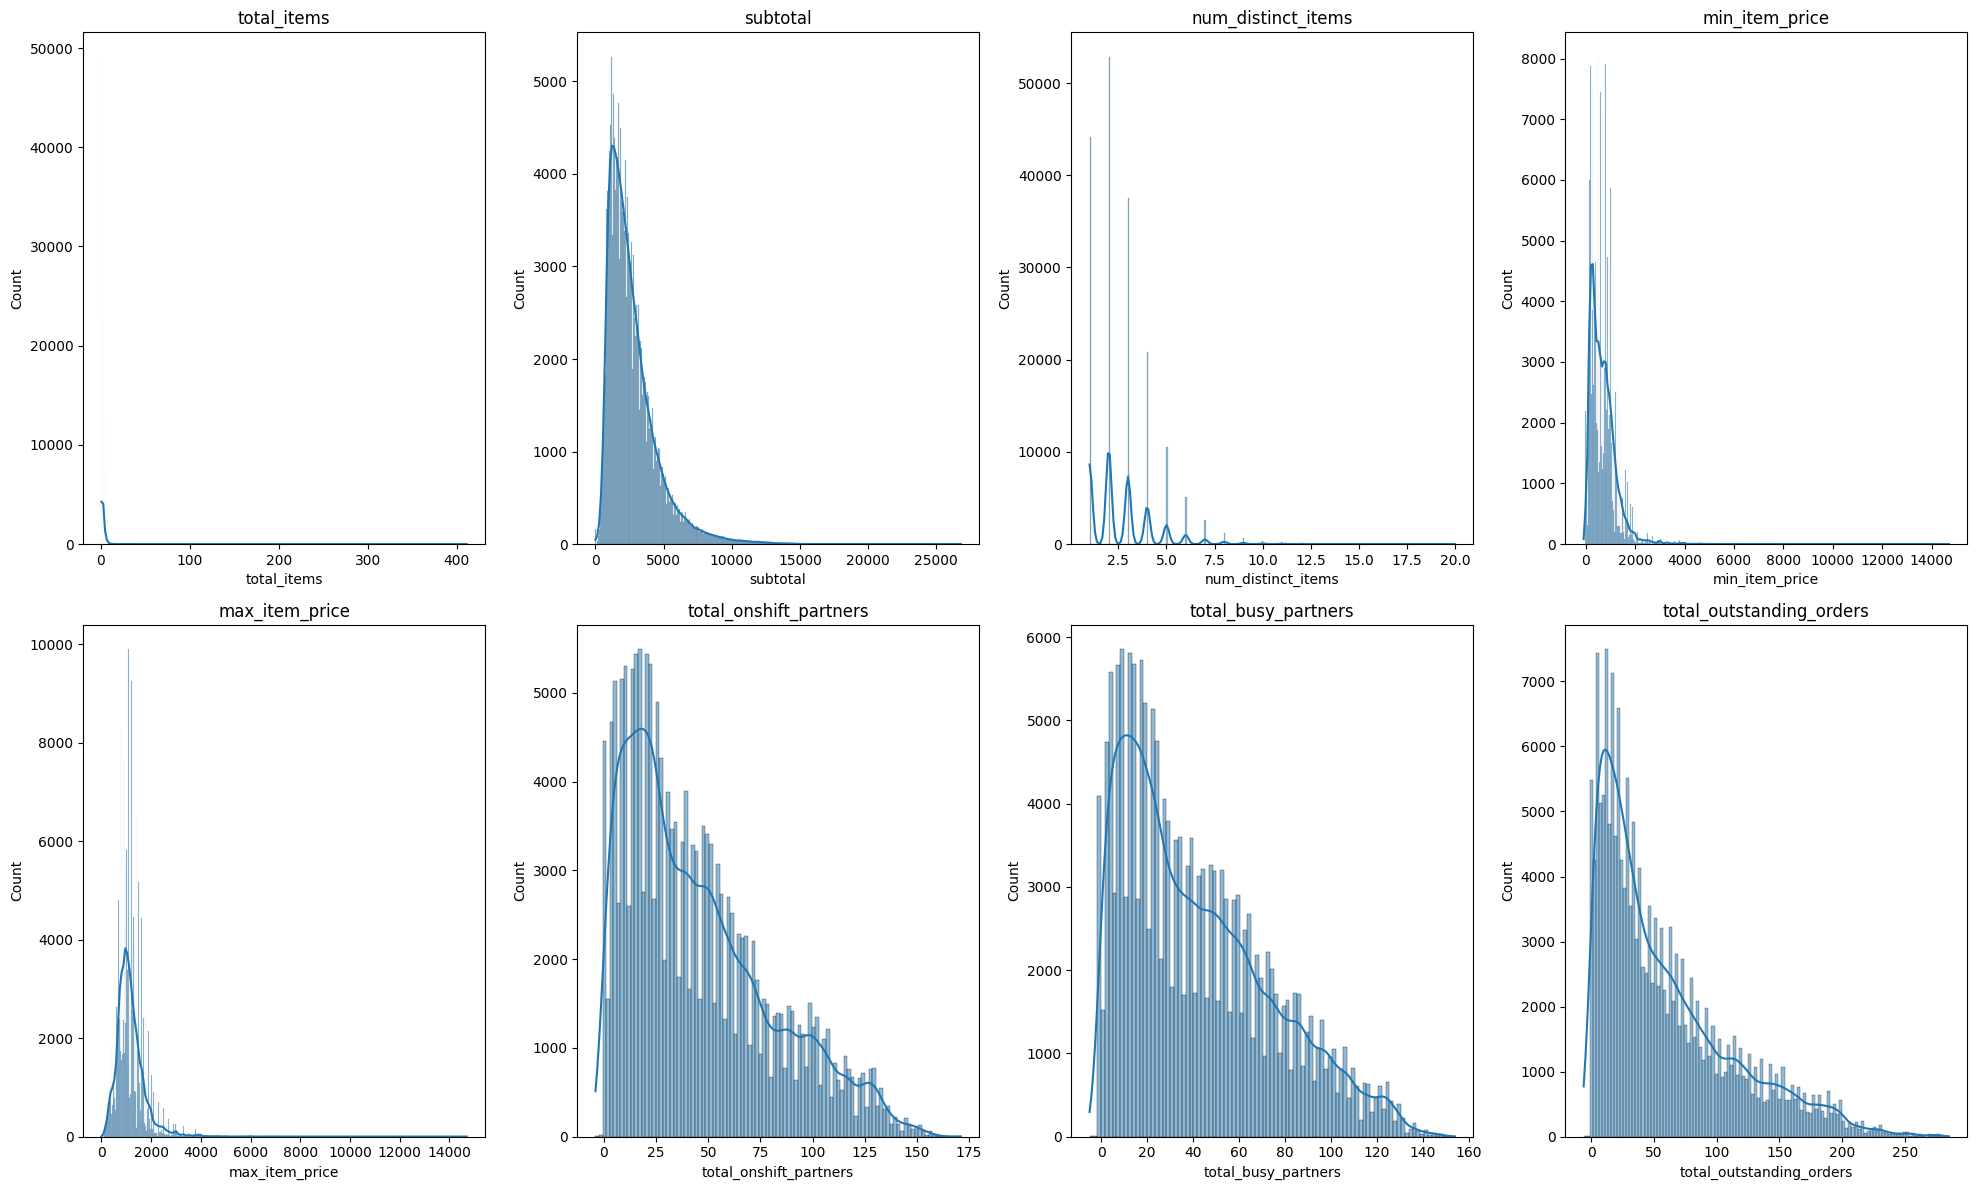

In [258]:
# check distribution of each numerical variable

rows, cols = 2, 4  # 2 rows, 4 columns
fig, axis = plt.subplots(rows, cols, figsize=(20, 12))

index = 0
for row in range(rows):
    for col in range(cols):
        if index < len(num_cols):  # Check index bounds
            sns.histplot(df[num_cols[index]], kde=True, ax=axis[row, col])
            axis[row, col].set_title(num_cols[index])
        else:
            axis[row, col].axis("off")  # Hide empty subplots if num_cols is smaller than the grid
        index += 1

plt.tight_layout()
plt.show()

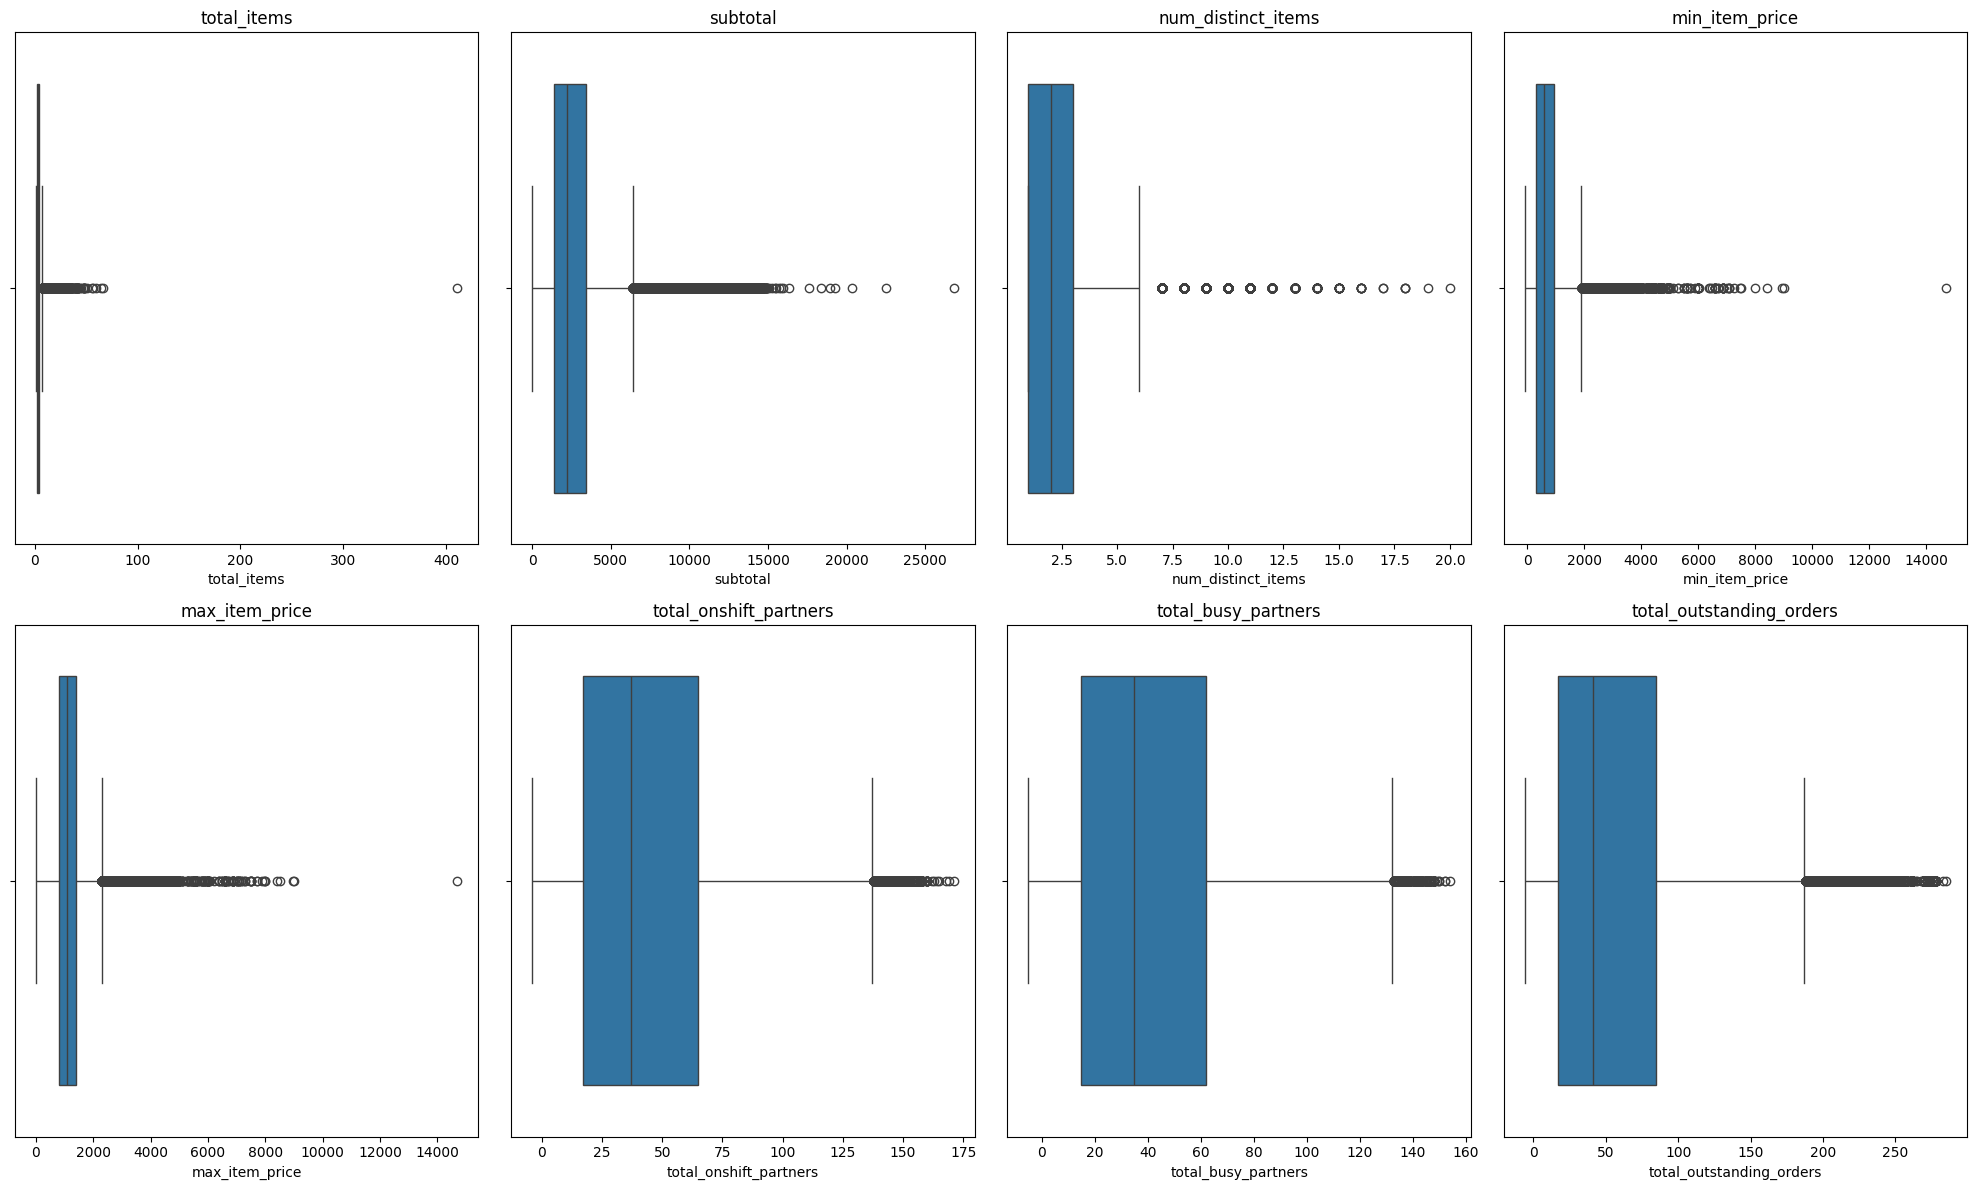

In [259]:
# check for outliers using boxplots

rows, cols = 2, 4  # 2 rows, 4 columns
fig, axis = plt.subplots(rows, cols, figsize=(20, 12))

index = 0
for row in range(rows):
    for col in range(cols):
        if index < len(num_cols):  # Check index bounds
            sns.boxplot(x=num_cols[index], data=df, ax=axis[row, col])
            axis[row, col].set_title(num_cols[index])
        else:
            axis[row, col].axis("off")  # Hide empty subplots if num_cols is smaller than the grid
        index += 1

plt.tight_layout()
plt.show()

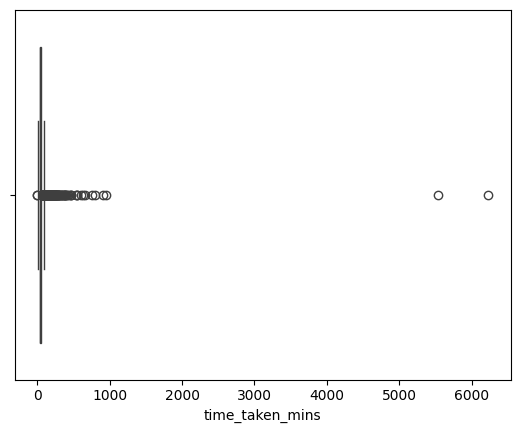

In [260]:
sns.boxplot(x=target, data=df)
plt.show()

In [261]:
# removing outliers in target variable
df= df[df['time_taken_mins']<1000]

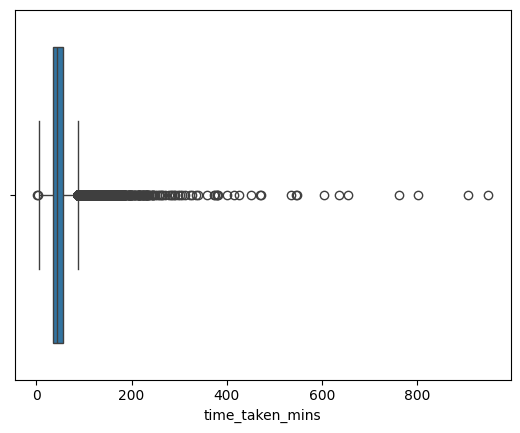

In [262]:
sns.boxplot(x=target, data=df)
plt.show()

In [263]:
# check unique values in categorical variables
for col in cat_cols:
    print("Column: {} Unique values: {}".format(col, df[col].nunique()))

Column: market_id Unique values: 6
Column: store_id Unique values: 5645
Column: order_protocol Unique values: 7
Column: store_primary_category Unique values: 73
Column: hour Unique values: 19
Column: day Unique values: 7


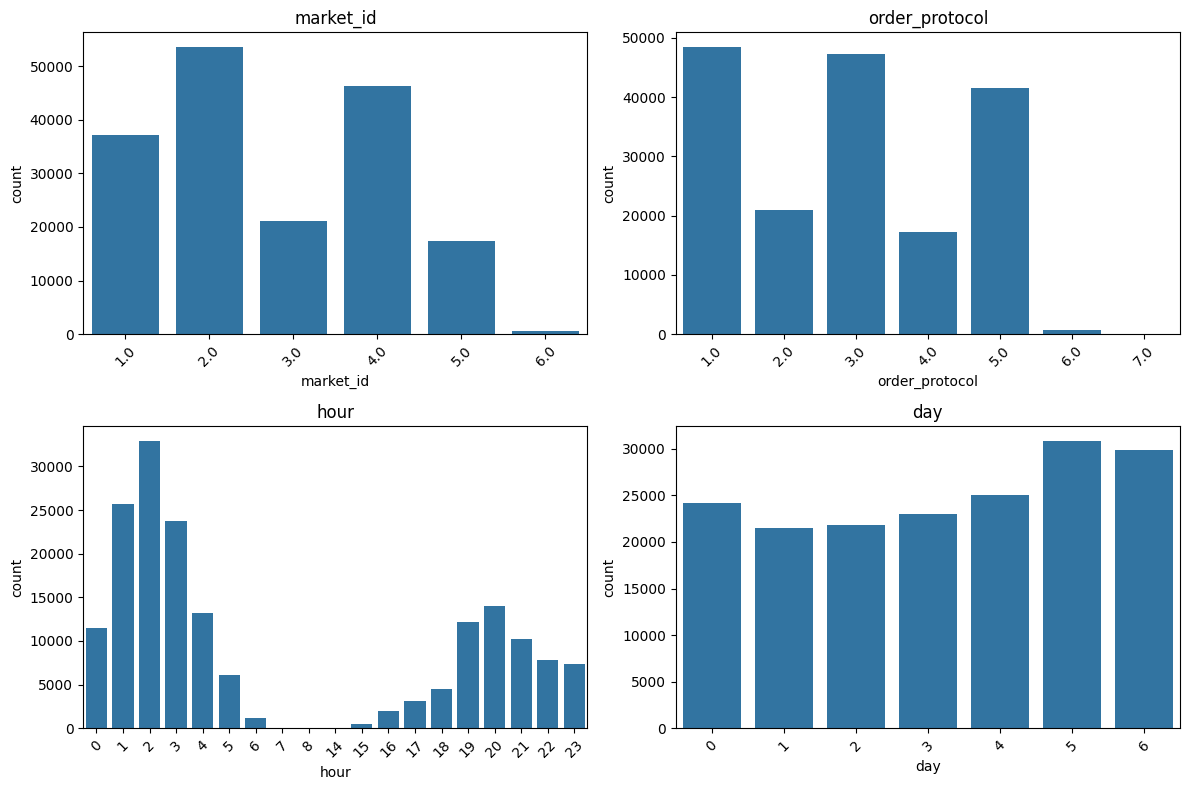

In [264]:
cols = ['market_id', 'order_protocol', 'hour', 'day']

plt.figure(figsize=(12, 8))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()

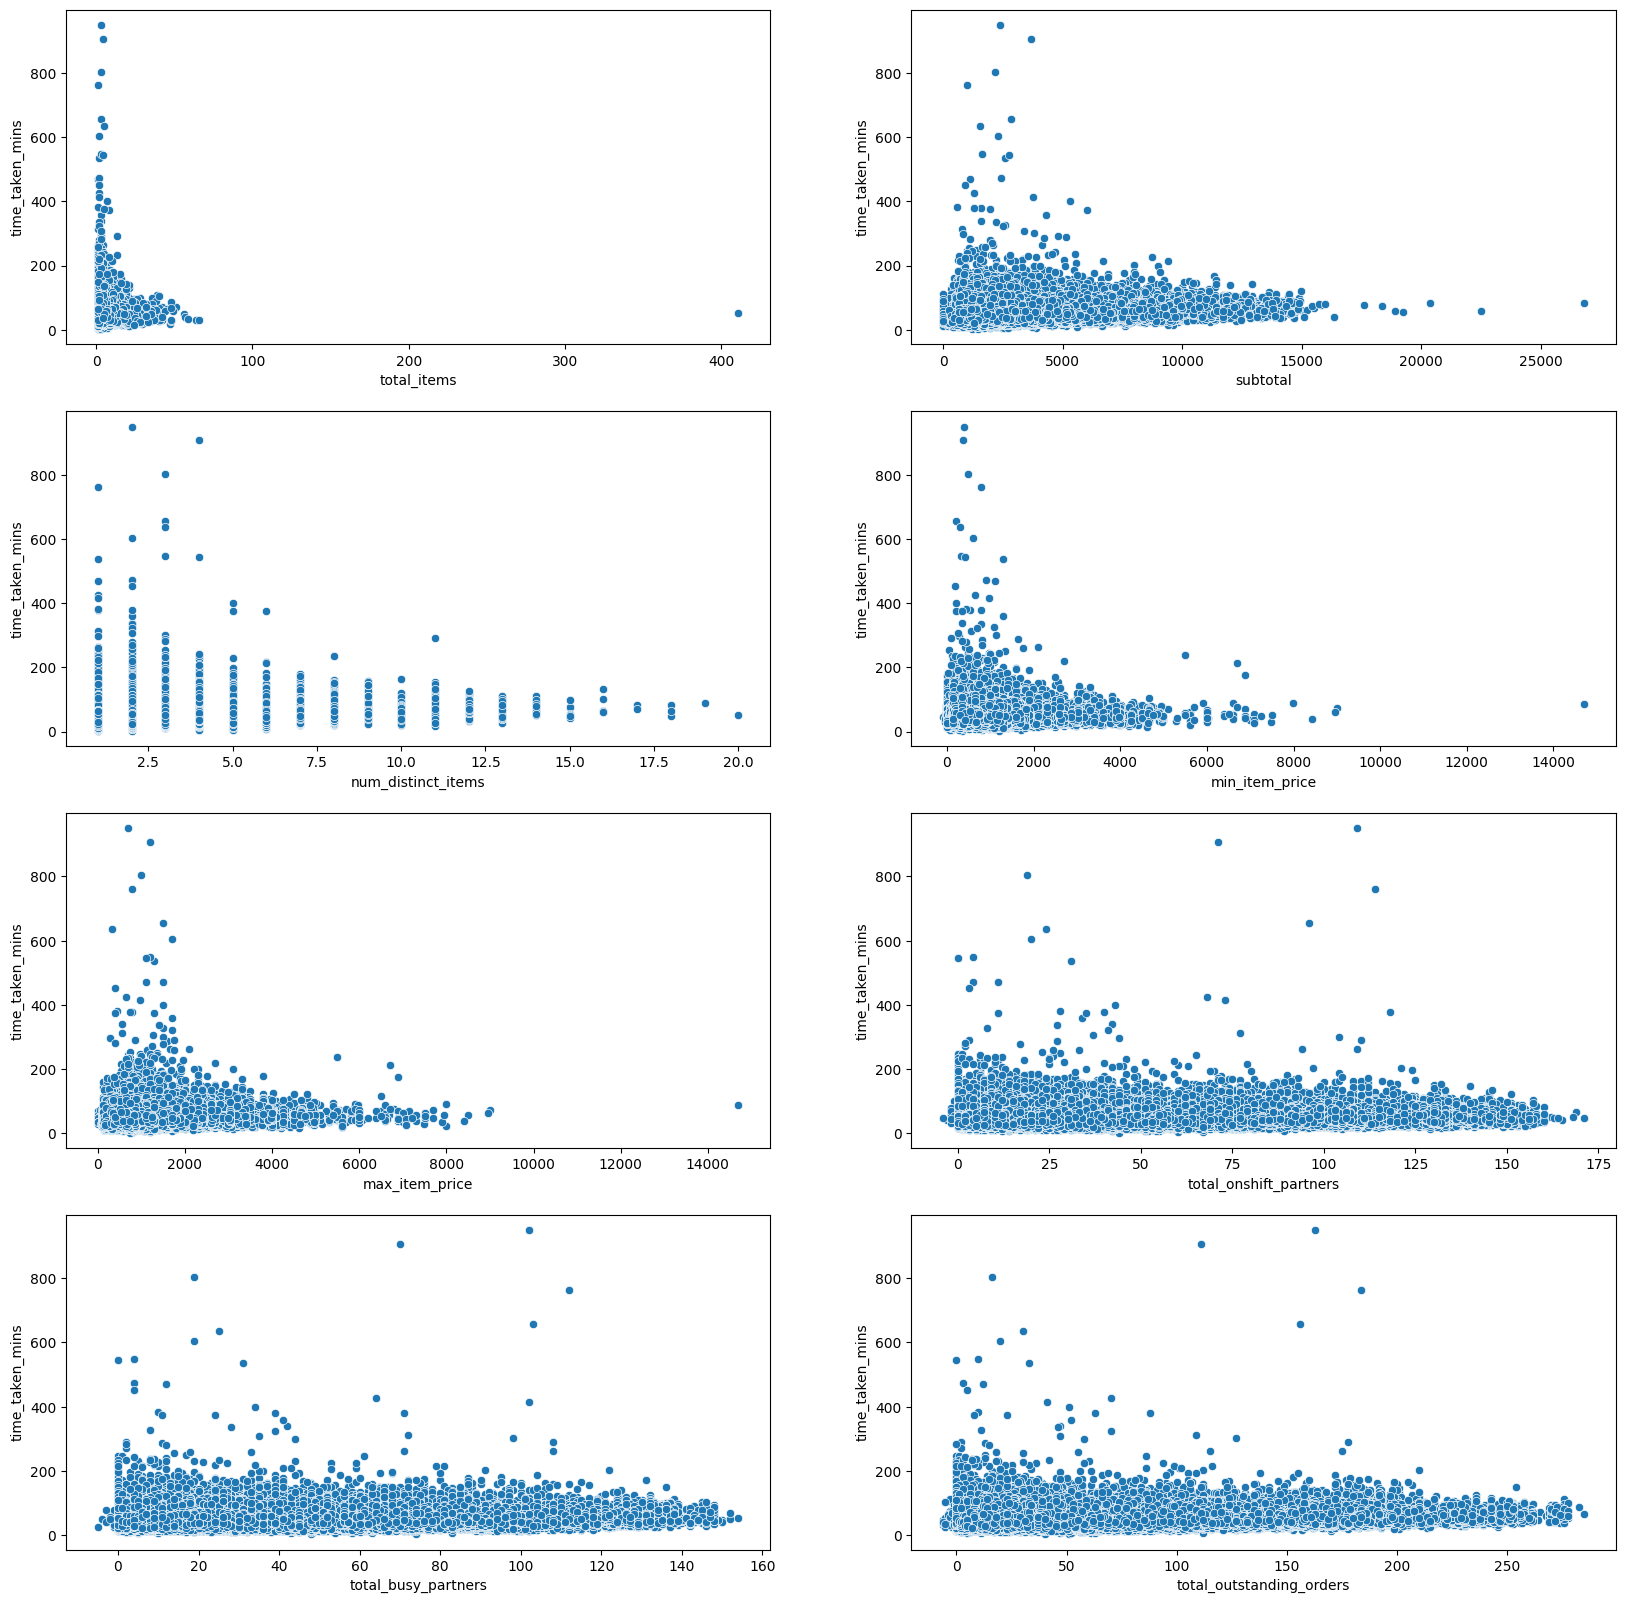

In [265]:
# check distribution of each numerical variable
rows, cols = 4, 2
fig, ax = plt.subplots(rows,cols, figsize=(20, 20))
index = 0
for row in range(rows):
    for col in range(cols):
        sns.scatterplot(x=num_cols[index], y=target, data=df, ax=ax[row, col])
        index += 1
        
plt.show()

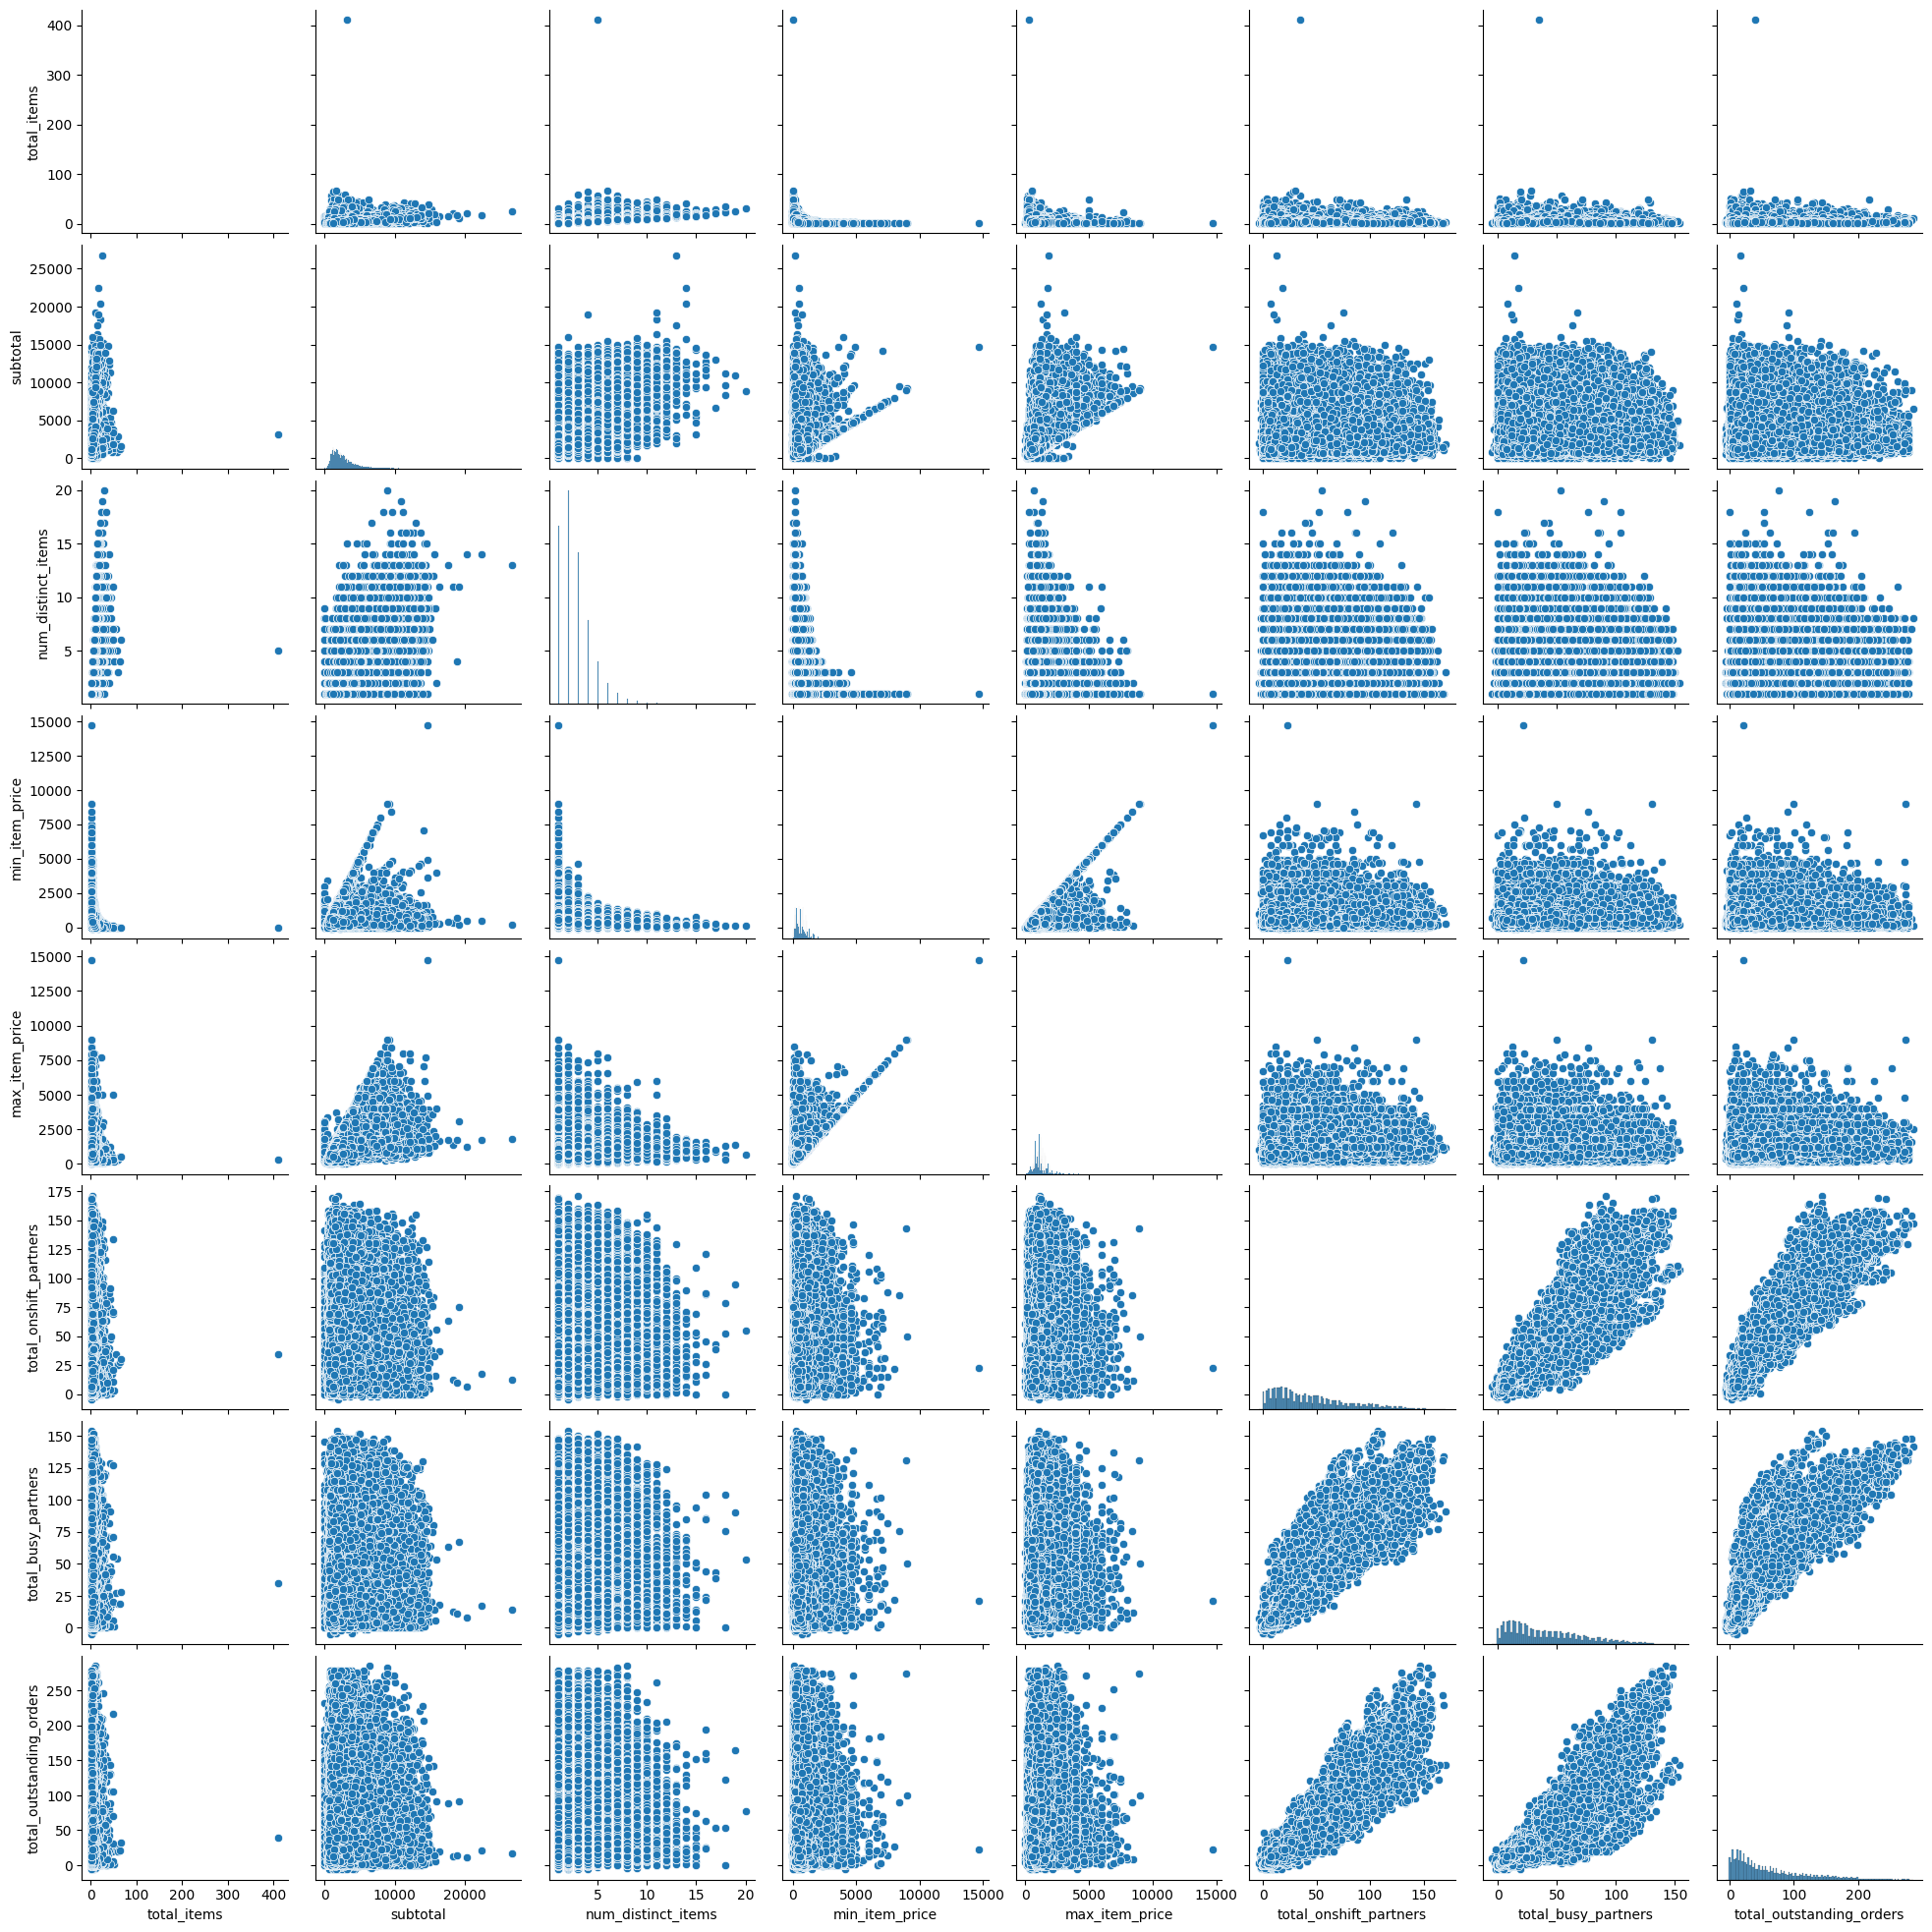

In [266]:
sns.pairplot(df[num_cols])
plt.show()

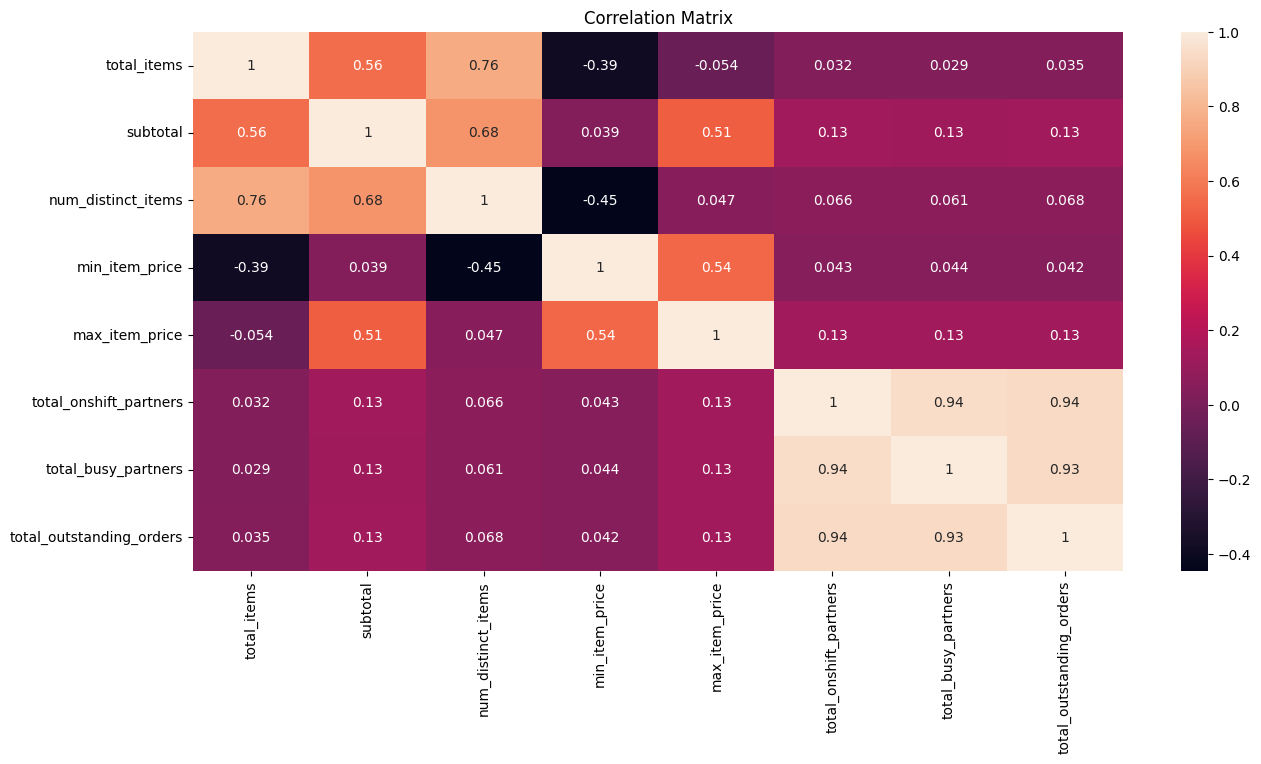

In [267]:
# Heatmap

plt.figure(figsize=(15, 7))

corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [268]:
from sklearn.preprocessing import OneHotEncoder

ohe_cols = ['market_id', 'order_protocol']

ohe = OneHotEncoder(sparse_output=False, drop='first')  # Drop first to avoid multicollinearity
ohe_encoded = pd.DataFrame(ohe.fit_transform(df[ohe_cols]), columns=ohe.get_feature_names_out(ohe_cols))
df = df.drop(columns=ohe_cols).reset_index(drop=True)
df = pd.concat([df, ohe_encoded], axis=1)

In [269]:
from category_encoders.target_encoder import TargetEncoder

te_cols = ['store_id', 'store_primary_category', 'hour', 'day']

te = TargetEncoder()
df[te_cols] = te.fit_transform(df[te_cols], df['time_taken_mins'])

In [270]:
df.head()

,store_id,store_primary_category,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,...,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,49.690979,47.882237,4,3441,4,557,1239,33.0,14.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47.601020,44.329557,1,1900,1,1400,1400,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,47.601020,49.551135,4,4771,3,820,1604,8.0,6.0,18.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,51.075173,50.292766,1,1525,1,1525,1525,5.0,6.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,51.075173,50.292766,2,3620,2,1425,2195,5.0,5.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [271]:
y = df['time_taken_mins']
X = df.drop(['time_taken_mins'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [272]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [273]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("mse : ",mse)

rmse = mse**0.5
print("rmse : ",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("mase : ",mae)

mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
print("mape : ",mape)

score = r2_score(y_test,y_pred)
print("r2_score :", score)

mse :  251.64013988614087
rmse :  15.86316928883194
mase :  10.962479376561971
mape :  25.19992068065659
r2_score : 0.2934188302039292


In [274]:
y = df['time_taken_mins']
X = df.drop(['time_taken_mins'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [275]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [276]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(11, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='Adam', metrics=['mse','mae'])

history=model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_split=0.2)

Epoch 1/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3092.3638 - mae: 33.7053 - mse: 3092.3638 - val_loss: 388.5004 - val_mae: 13.3384 - val_mse: 388.5004
Epoch 2/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 357.0734 - mae: 12.8636 - mse: 357.0734 - val_loss: 305.7874 - val_mae: 12.7679 - val_mse: 305.7874
Epoch 3/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 327.7329 - mae: 11.9187 - mse: 327.7329 - val_loss: 282.8389 - val_mae: 11.7728 - val_mse: 282.8389
Epoch 4/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 331.4464 - mae: 11.7293 - mse: 331.4464 - val_loss: 292.3303 - val_mae: 11.4163 - val_mse: 292.3303
Epoch 5/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 331.7928 - mae: 11.8699 - mse: 331.7928 - val_loss: 277.4631 - val_mae: 11.5385 - val_mse: 277.4631
Epoch 6/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 282.6234 - mae: 11.5924 - mse: 282.6234 - val_loss: 282.6463 - val_mae: 11.3531 - val_mse: 282.6463
Epoch 7/10
221/221 ━━━━━━━━━━━━━━━━━━━

In [277]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 11)             │           275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,246 (20.50 KB)

 Trainable params: 1,748 (6.83 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,498 (13.67 KB)

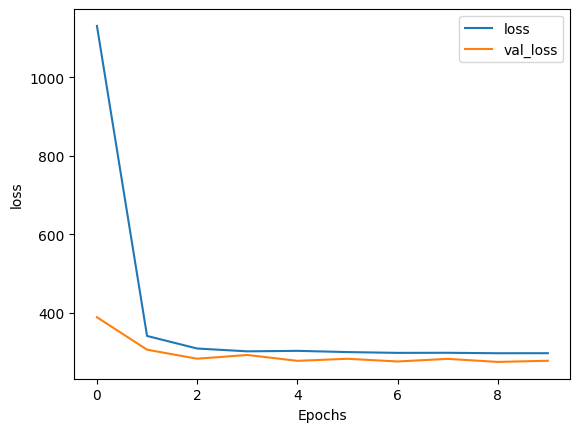

In [278]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.legend(['loss','val_loss'])
plt.show()

In [279]:
y_pred = model.predict(X_test)

print("errors for neural network")

mse = mean_squared_error(y_test, y_pred)
print("mse : ",mse)

rmse = mse**.5
print("rmse : ",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("mae : ",mae)

mape = mean_absolute_percentage_error(y_test, y_pred)
print("mape :", mape)

score = r2_score(y_test,y_pred)
print("r2_score :", score)

1102/1102 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
errors for neural network
mse :  268.95152325401773
rmse :  16.399741560586182
mae :  11.277012142235506
mape : tf.Tensor([18.191261 21.837137 11.474459 ... 19.887852 29.788345 40.15382 ], shape=(35250,), dtype=float32)
r2_score : 0.24481014036455306


In [280]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam
# import keras_tuner as kt

# # Function to build the model
# def build_model(hp):
#     model = Sequential()
    
#     # Input layer with variable number of neurons
#     model.add(Dense(hp.Int('units_1', min_value=8, max_value=64, step=8),
#                     activation='relu', kernel_initializer='normal'))
    
#     # Add hidden layers (2-3 layers) with variable neurons
#     for i in range(hp.Int('num_layers', 1, 3)):
#         model.add(Dense(hp.Int(f'units_{i+2}', min_value=16, max_value=128, step=16),
#                         activation='relu'))
    
#     # Output layer (1 neuron for regression)
#     model.add(Dense(1, activation='linear'))
    
#     # Compile with variable learning rate
#     model.compile(
#         optimizer=Adam(hp.Choice('learning_rate', [0.001, 0.005, 0.01])),
#         loss='mse',
#         metrics=['mse', 'mae']
#     )
    
#     return model

# # Initialize the tuner (Random Search for hyperparameters)
# tuner = kt.RandomSearch(
#     build_model,
#     objective='val_loss',  # Minimize validation loss (MSE)
#     max_trials=10,  # Try 10 different configurations
#     executions_per_trial=1,
#     directory='hyperparameter_tuning',
#     project_name='NN_regression'
# )

# # Run hyperparameter search
# tuner.search(X_train, y_train, epochs=20, batch_size=512, validation_split=0.2, verbose=1)

# # Get the best hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# # Print best hyperparameters
# print(f"Best Neurons (Layer 1): {best_hps.get('units_1')}")
# print(f"Number of Hidden Layers: {best_hps.get('num_layers')}")
# for i in range(best_hps.get('num_layers')):
#     print(f"Neurons in Layer {i+2}: {best_hps.get(f'units_{i+2}')}")
# print(f"Best Learning Rate: {best_hps.get('learning_rate')}")

# # Build and train the best model
# best_model = tuner.hypermodel.build(best_hps)
# history = best_model.fit(X_train, y_train, epochs=50, batch_size=512, validation_split=0.2, verbose=1)

# # Save best model
# # best_model.save('best_nn_model.h5')

# # Model Evaluation
# y_pred = best_model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("\n📊 Model Performance on Test Data:")
# print(f"✅ Mean Squared Error (MSE): {mse:.4f}")
# print(f"✅ Mean Absolute Error (MAE): {mae:.4f}")
# print(f"✅ R² Score: {r2:.4f}")


In [281]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam
# import keras_tuner as kt  # Install using: pip install keras-tuner
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # Function to build the model
# def build_model(hp):
#     model = Sequential()
    
#     # Input layer with variable number of neurons
#     model.add(Dense(hp.Int('units_1', min_value=8, max_value=64, step=8),
#                     activation='relu', kernel_initializer='normal'))
    
#     # Add hidden layers (1-3 layers) with variable neurons
#     for i in range(hp.Int('num_layers', 1, 3)):
#         model.add(Dense(hp.Int(f'units_{i+2}', min_value=16, max_value=128, step=16),
#                         activation='relu'))
    
#     # Output layer (1 neuron for regression)
#     model.add(Dense(1, activation='linear'))
    
#     # Compile with variable learning rate
#     model.compile(
#         optimizer=Adam(hp.Choice('learning_rate', [0.0001, 0.001, 0.005, 0.01])),
#         loss='mse',
#         metrics=['mse', 'mae']
#     )
    
#     return model

# # Use Bayesian Optimization (More Sample-Efficient than Hyperband)
# tuner = kt.BayesianOptimization(
#     build_model,
#     objective='val_loss',  # Minimize validation loss (MSE)
#     max_trials=20,  # Try 20 different hyperparameter configurations
#     executions_per_trial=1,  # Run each model once
#     directory='hyperparameter_tuning',
#     project_name='NN_regression_bayesian'
# )

# # Define Early Stopping to Prevent Overfitting
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     patience=5,  # Stop if validation loss doesn't improve for 5 epochs
#     restore_best_weights=True
# )

# # Run hyperparameter search
# tuner.search(X_train, y_train, epochs=50, batch_size=512, 
#              validation_split=0.2, verbose=1, callbacks=[early_stopping])

# # Get the best hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# # Print best hyperparameters
# print(f"Best Neurons (Layer 1): {best_hps.get('units_1')}")
# print(f"Number of Hidden Layers: {best_hps.get('num_layers')}")
# for i in range(best_hps.get('num_layers')):
#     print(f"Neurons in Layer {i+2}: {best_hps.get(f'units_{i+2}')}")
# print(f"Best Learning Rate: {best_hps.get('learning_rate')}")

# # Build and train the best model
# best_model = tuner.hypermodel.build(best_hps)
# history = best_model.fit(X_train, y_train, epochs=100, batch_size=512, 
#                          validation_data=(X_val, y_val), verbose=1, callbacks=[early_stopping])

# # Save best model
# # best_model.save('best_nn_model_bayesian.h5')

# # Model Evaluation
# y_pred = best_model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("\n📊 Model Performance on Test Data:")
# print(f"✅ Mean Squared Error (MSE): {mse:.4f}")
# print(f"✅ Mean Absolute Error (MAE): {mae:.4f}")
# print(f"✅ R² Score: {r2:.4f}")

In [282]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# import keras_tuner as kt  # Install using: pip install keras-tuner
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # Function to build the model
# def build_model(hp):
#     model = Sequential()
    
#     # Input layer with variable number of neurons
#     model.add(Dense(hp.Int('units_1', min_value=8, max_value=64, step=8),
#                     activation='relu', kernel_initializer='normal'))
    
#     # Add hidden layers (1-3 layers) with variable neurons and Dropout
#     for i in range(hp.Int('num_layers', 1, 3)):
#         model.add(Dense(hp.Int(f'units_{i+2}', min_value=16, max_value=128, step=16),
#                         activation='relu'))
#         model.add(Dropout(hp.Float(f'dropout_{i+2}', min_value=0.1, max_value=0.5, step=0.1)))

#     # Output layer (1 neuron for regression)
#     model.add(Dense(1, activation='linear'))
    
#     # Compile with variable learning rate
#     model.compile(
#         optimizer=Adam(hp.Choice('learning_rate', [0.0001, 0.001, 0.005, 0.01])),
#         loss='mse',
#         metrics=['mse', 'mae']
#     )
    
#     return model

# # Use Bayesian Optimization (More Sample-Efficient than Hyperband)
# tuner = kt.BayesianOptimization(
#     build_model,
#     objective='val_loss',  # Minimize validation loss (MSE)
#     max_trials=20,  # Try 20 different hyperparameter configurations
#     executions_per_trial=1,  # Run each model once
#     directory='hyperparameter_tuning',
#     project_name='NN_regression_bayesian'
# )

# # Define Early Stopping to Prevent Overfitting
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     patience=5,  # Stop if validation loss doesn't improve for 5 epochs
#     restore_best_weights=True
# )

# # **FIX: Manually define batch sizes (avoid hp.Choice outside build_model)**
# batch_sizes = [128, 256, 512]

# # Run hyperparameter search
# tuner.search(X_train, y_train, epochs=50, 
#              batch_size=256,  # Use a fixed batch size for searching
#              validation_split=0.2, verbose=1, callbacks=[early_stopping])

# # Get the best hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# # Print best hyperparameters
# print(f"Best Neurons (Layer 1): {best_hps.get('units_1')}")
# print(f"Number of Hidden Layers: {best_hps.get('num_layers')}")

# for i in range(best_hps.get('num_layers')):
#     neurons = best_hps.get(f'units_{i+2}')
#     dropout = best_hps.get(f'dropout_{i+2}', None)  # Default to None if not found
    
#     print(f"Neurons in Layer {i+2}: {neurons}")
    
#     if dropout is not None:
#         print(f"Dropout Rate in Layer {i+2}: {dropout}")

# print(f"Best Learning Rate: {best_hps.get('learning_rate')}")


# # Build and train the best model with optimized batch size
# best_model = tuner.hypermodel.build(best_hps)

# # **Now, tune batch size manually by testing different values**
# best_batch_size = min(batch_sizes, key=lambda bs: best_model.fit(X_train, y_train, 
#                                                                  epochs=10, batch_size=bs, 
#                                                                  validation_split=0.2, verbose=0).history['val_loss'][-1])

# history = best_model.fit(X_train, y_train, epochs=100, 
#                          batch_size=best_batch_size,  
#                          validation_data=(X_val, y_val), verbose=1, callbacks=[early_stopping])

# # Save best model
# # best_model.save('best_nn_model_bayesian_with_dropout.h5')

# # Model Evaluation
# y_pred = best_model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("\n📊 Model Performance on Test Data:")
# print(f"✅ Mean Squared Error (MSE): {mse:.4f}")
# print(f"✅ Mean Absolute Error (MAE): {mae:.4f}")
# print(f"✅ R² Score: {r2:.4f}")
